# **Lab 04: Matrix Decomposition Techniques**

In this lab, we will be learn how to use Python matrix decomposition techniques to solve real world problems.


Review: In Lab03, we learned how to generate random vectors and matrices.

Python matrix decomposition functions

Learn the input and output of the following decomposition algorithms

https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html

https://numpy.org/devdocs/reference/generated/numpy.linalg.svd.html#

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html



# **Application 1: Solving linear equations using LU decomposition**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

In this application, compare the results from the following two methods

1. Find LU decomposition, solve Ly=b, then Ux=y.
   Study the code here

   https://stackoverflow.com/questions/63920172/python-code-for-solving-a-system-from-lu-decomposition-with-forward-and-backward

2. Use linalg.solve directly.

In [ ]:
#TODO: Copy the code from the StackOverFlow Link
import numpy as np

L = np.array([(1,0,0,0),(-1,1,0,0),(2,-1,1,0),(-3,2,-2,1)])
U = np.array([(2,1,-1,3),(0,1,-1,3),(0,0,-1,3),(0,0,0,3)])
b = np.array([12,-8,21,-26])

def forward_subs(L,b):
    y=[]
    for i in range(len(b)):
        y.append(b[i])
        for j in range(i):
            y[i]=y[i]-(L[i,j]*y[j])
        y[i]=y[i]/L[i,i]

    return y

def back_subs(U,y):
    x=np.zeros_like(y)
    for i in range(len(x),0,-1):
      x[i-1]=(y[i-1]-np.dot(U[i-1,i:],x[i:]))/U[i-1,i-1]

    return x

def solve_system_LU(L,U,b):
    y=forward_subs(L,b)
    x=back_subs(U,y)

    return x

x_LU = solve_system_LU(L, U, b)

#TODO: Solve the system using linalg.solve

x_direct = np.linalg.solve(np.dot(L, U), b)

#TODO: Print both results to compare

print("Solution using LU decomposition:", x_LU)
print("Solution using linalg.solve:", x_direct)

Solution using LU decomposition: [4.         3.         3.         1.33333333]
Solution using linalg.solve: [4.         3.         3.         1.33333333]


# **Application 2: Least squares (orthogonal projection) using QR**

Use the QR decomposition to generate an orthogonal matrix. Generate a random vector. Numerically show that orthogonal matrix is length preserving.



Understand how to solve least squares min_x ||Rx-b|| using QR decomposition

For more general problems, study the following two methods.

Method 1: study the following code

https://rh8liuqy.github.io/OLS_QR.html

Method 2: Use the built-in function directly. Check

https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html


In [ ]:
#TODO: Copy code from GetHub link in Method 1

import numpy as np
import statsmodels.api as sm
import timeit
import matplotlib.pyplot as plt

np.random.seed(511)

y = np.concatenate([np.random.normal(loc=20,scale=1,size=100),
np.random.normal(loc=40,scale=1,size=100),
np.random.normal(loc=60,scale=1,size=100)])

X1 = np.ones(300)
X2 = np.concatenate([np.ones(100),np.zeros(200)])
X3 = np.concatenate([np.zeros(100),np.ones(100),np.zeros(100)])
X = np.column_stack((X1,X2,X3))

beta_est = np.linalg.inv(X.T @ X) @ X.T @ y
beta_est

Q,R = np.linalg.qr(X)
beta_est_qr = np.linalg.inv(R) @ Q.T @ y
beta_est_qr

model = sm.OLS(y,X)
model.fit().summary()

#TODO: Solve the linear regression problem using numpy.linalg.lstsq

beta_est_lstsq, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

#TODO: Print both results to compare

print("Beta estimates using QR decomposition:", beta_est_qr)
print("Beta estimates using numpy.linalg.lstsq:", beta_est_lstsq)

Beta estimates using QR decomposition: [ 60.03807704 -40.05588504 -20.08218135]
Beta estimates using numpy.linalg.lstsq: [ 60.03807704 -40.05588504 -20.08218135]


# **Application 3: SVD and image compression**

Use what your learned from Lab 01, upload a picture and transform to gray scale.

For the resulting matrix, run the SVD algorithm and show the compressed image for keeping different number of singular values.


Mounted at /content/drive


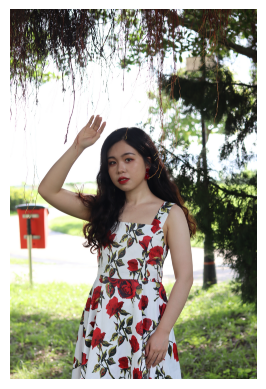

In [ ]:
#TODO: Connect to Google Drive and upload image like in Lab 1

from google.colab import drive
drive.mount("/content/drive",force_remount=True)

import matplotlib.pyplot as plt
import matplotlib.image as mimg

img0 = mimg.imread("/content/drive/MyDrive/Colab Notebooks/1.jpg")
img = img0

from scipy import ndimage
rimg = ndimage.rotate(img, 90)

plt.imshow(rimg)
plt.axis("off")
plt.show()

In [ ]:
#TODO: Import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

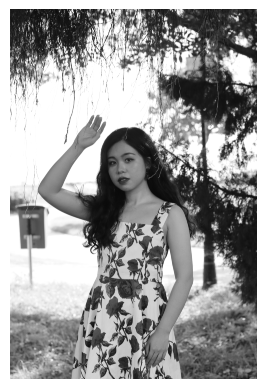

In [ ]:
#TODO: Convert the image to grayscale

grayscale_image = 0.2989 * rimg[:, :, 0] + 0.5870 * rimg[:, :, 1] + 0.1140 * rimg[:, :, 2]

plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()

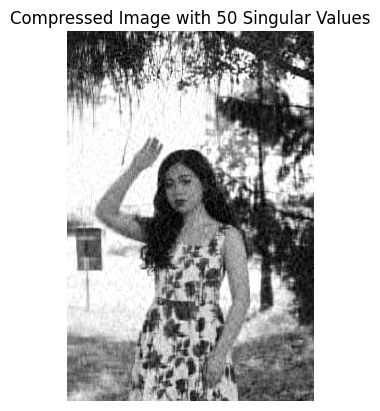

In [ ]:
#TODO: Perform the SVD
U, s, Vt = svd(grayscale_image, full_matrices=False)

#TODO: Chose a compression value (k values)
k = 50

#TODO: Reconstruct the compressed image
compressed_image = np.dot(U[:, :k], np.dot(np.diag(s[:k]), Vt[:k, :]))

#TODO: Display the compressed image
plt.imshow(compressed_image, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title(f"Compressed Image with {k} Singular Values")
plt.show()